In [ ]:
import matplotlib.pyplot as plt
import numpy as np

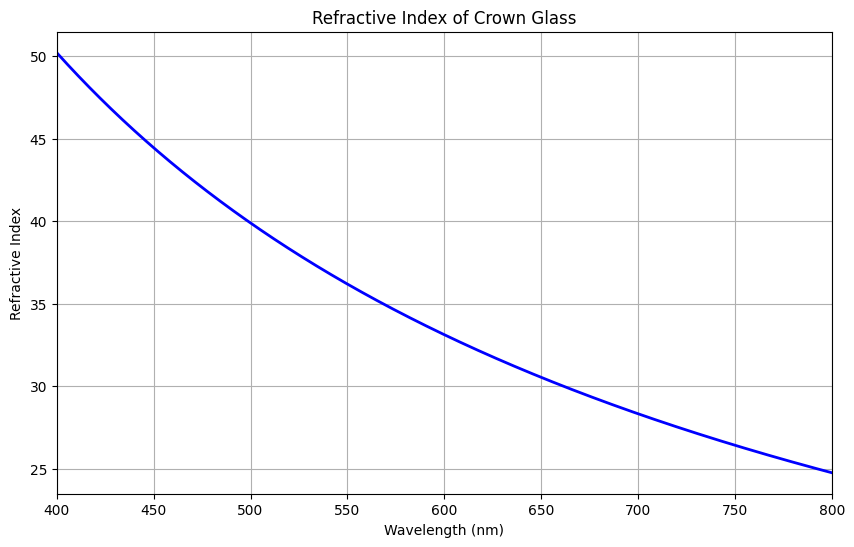

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sellmeier_formula(wavelength_um):
    B=np.array([1.03961212,0.231792344,1.01046945])
    C=np.array([0.00600069867,0.0200179144,103.560653])
    wavelength_sq=wavelength_um**2
    for i in range(3):
        n_squared=1+sum(B[i]*wavelength_sq)/(wavelength_sq-C[i])
        return np.sqrt(n_squared)

def draw_graph(wavelengths,n):
    plt.figure(figsize=(10,6))
    plt.plot(wavelengths*1000,n,'b-',linewidth=2)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Refractive Index')
    plt.title('Refractive Index of Crown Glass')
    plt.grid(True)
    plt.xlim(400, 800)
    plt.savefig('refractive_index.png')


wavelengths=np.linspace(0.4,0.8,1000)
n=sellmeier_formula(wavelengths)
draw_graph(wavelengths,n)

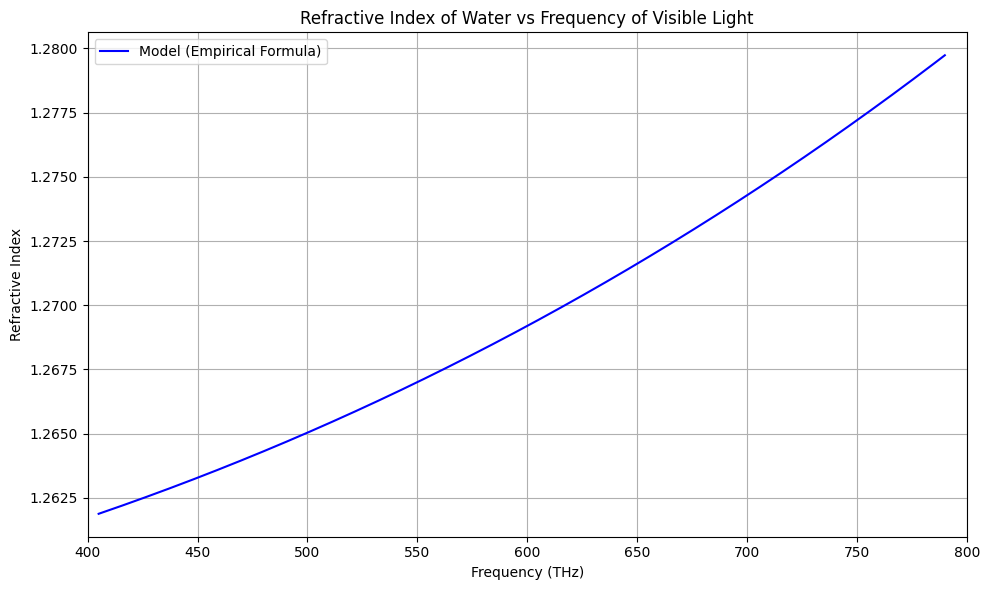

In [ ]:
f_THz = np.linspace(405, 790, 1000)         
f_PHz = f_THz / 1000                     

# Empirical formula: (nÂ² - 1)^(-1) = 1.731 - 0.261 * (f / 10^15)^2
n_squared_inverse = 1.731 - 0.261 * f_PHz**2
n = np.sqrt(1 + 1 / n_squared_inverse)      

plt.figure(figsize=(10, 6))
plt.plot(f_THz, n, label='Model (Empirical Formula)', color='blue')
plt.title('Refractive Index of Water vs Frequency of Visible Light')
plt.xlabel('Frequency (THz)')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.xlim(400, 800)  
plt.legend()
plt.tight_layout()
plt.show()

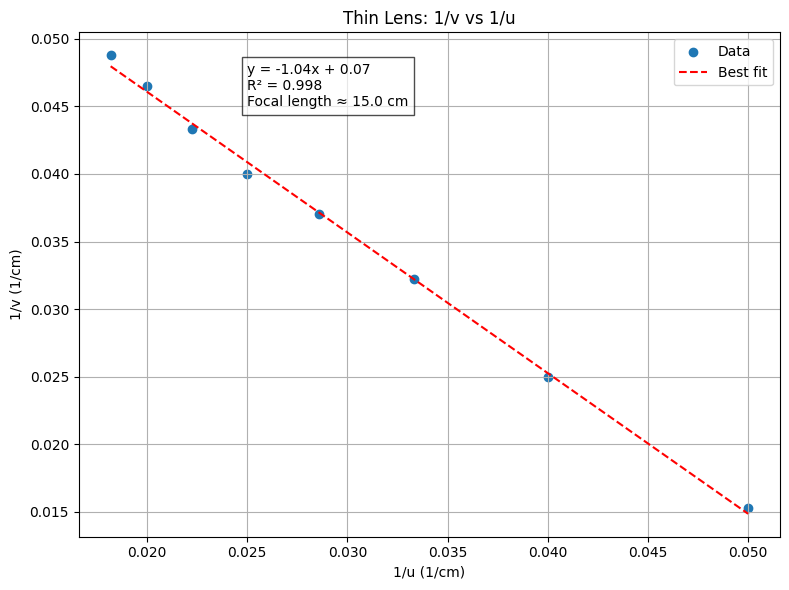

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

u = np.array([20, 25, 30, 35, 40, 45, 50, 55])
v = np.array([65.5, 40, 31, 27, 25, 23.1, 21.5, 20.5])

inv_u = 1 / u
inv_v = 1 / v

slope, intercept, r, _, _ = linregress(inv_u, inv_v)
f = 1 / intercept

x = np.linspace(min(inv_u), max(inv_u), 100)
y = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(inv_u, inv_v, label='Data')
plt.plot(x, y, 'r--', label='Best fit')

label = (
    f"y = {slope:.2f}x + {intercept:.2f}\n"
    f"RÂ² = {r**2:.3f}\n"
    f"Focal length â‰ˆ {f:.1f} cm"
)

plt.text(0.025, 0.045, label, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.xlabel('1/u (1/cm)')
plt.ylabel('1/v (1/cm)')
plt.title('Thin Lens: 1/v vs 1/u')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

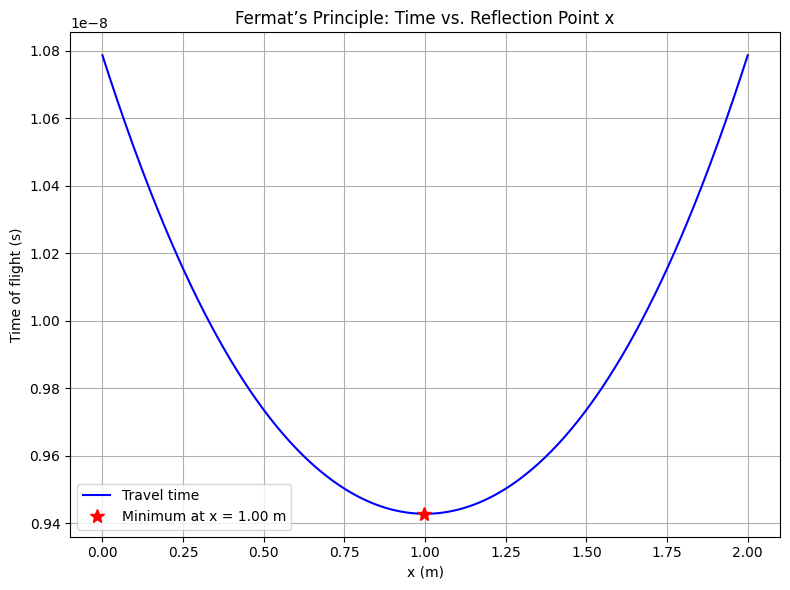

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 2.0
y = 1.0
c = 300000000
n = 1

x = np.linspace(0, L, 500)
t = (np.sqrt(x**2 + y**2) + np.sqrt((L - x)**2 + y**2)) / (c / n)

min_index = np.argmin(t)
x_min = x[min_index]
t_min = t[min_index]

plt.figure(figsize=(8, 6))
plt.plot(x, t, 'b', label='Travel time')
plt.plot(x_min, t_min, 'r*', markersize=10, label=f'Minimum at x = {x_min:.2f} m')

plt.xlabel('x (m)')
plt.ylabel('Time of flight (s)')
plt.title('Fermatâ€™s Principle: Time vs. Reflection Point x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

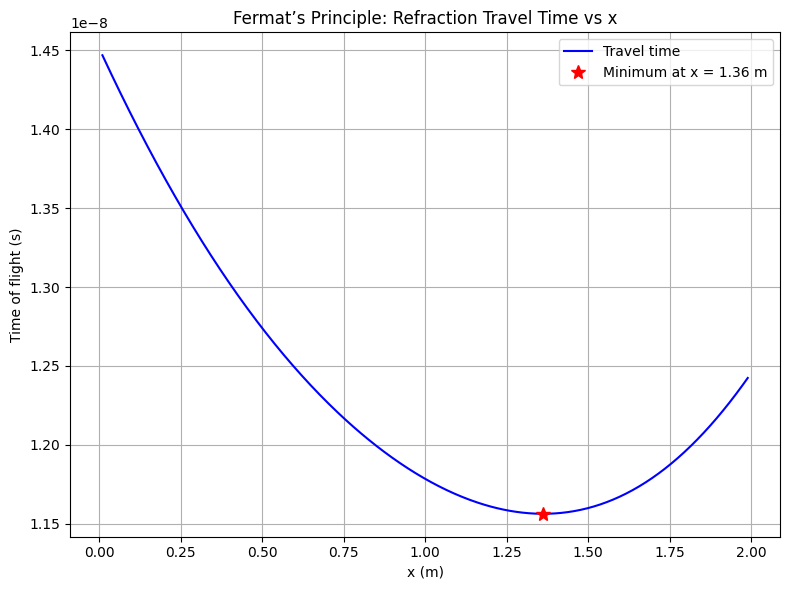

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0
Y = 1.0
L = 2.0
c = 3e8  
n1 = 1.0  
n2 = 1.5  
c1 = c / n1
c2 = c / n2


x = np.linspace(0.01, L - 0.01, 500)

t = np.sqrt(x**2 + y**2)/c1 + np.sqrt((L - x)**2 + Y**2)/c2

# Find minimum
min_index = np.argmin(t)
x_min = x[min_index]
t_min = t[min_index]

plt.figure(figsize=(8, 6))
plt.plot(x, t, 'b', label='Travel time')
plt.plot(x_min, t_min, 'r*', markersize=10, label=f'Minimum at x = {x_min:.2f} m')

plt.xlabel('x (m)')
plt.ylabel('Time of flight (s)')
plt.title("Fermatâ€™s Principle: Refraction Travel Time vs x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# import streamlit as st
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# st.set_page_config(page_title="Plane Mirror Reflection", layout="centered")

# st.title("ðŸªž Reflection in a Plane Mirror")

# # Upload image
# uploaded_file = st.file_uploader("Upload an image to reflect (the 'object')", type=["png", "jpg", "jpeg"])
# if uploaded_file is not None:
#     img = Image.open(uploaded_file).convert("RGB")
#     img_np = np.array(img)

#     st.sidebar.header("Object Position Controls")
#     x_offset = st.sidebar.slider("X Position", -1.0, 1.0, 0.2, 0.01)
#     y_offset = st.sidebar.slider("Y Position", -0.5, 0.5, 0.0, 0.01)
#     img_width = st.sidebar.slider("Image Width", 0.1, 1.0, 0.4, 0.01)

#     img_height = img_np.shape[0] / img_np.shape[1] * img_width

#     fig, ax = plt.subplots()
#     ax.set_xlim(-1, 1)
#     ax.set_ylim(-0.6, 0.6)
#     ax.set_aspect('equal')
#     ax.set_title("Reflection in a Plane Mirror")

#     # Draw mirror
#     ax.axvline(x=0, color='blue', linestyle='-', linewidth=1, label="Mirror")

#     # Draw object and virtual image
#     ax.imshow(img_np, extent=[x_offset, x_offset + img_width, y_offset, y_offset + img_height])
#     ax.imshow(np.fliplr(img_np), extent=[-x_offset - img_width, -x_offset, y_offset, y_offset + img_height], alpha=0.7)

#     ax.legend(["Mirror"])
#     st.pyplot(fig)
# else:
#     st.info("Upload an image to begin.")




# THIS HAS BEEN DONE IN TASK5.py DUE TO JUPYTER NOTEBOOK BEING INCOMPATIBLE WITH SREAMLIT !!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# import streamlit as st
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# st.set_page_config(page_title="Task 6", layout="centered")

# st.title("Task 6")
# st.write("Simulates real, inverted image formed by a thin lens.")

# # Upload object image
# uploaded_file = st.file_uploader("Upload an object image", type=["png", "jpg", "jpeg"])
# if uploaded_file is not None:
#     img = Image.open(uploaded_file).convert("RGB")
#     img_np = np.array(img)

#     st.sidebar.header("Controls")

#     # Lens focal length
#     f = st.sidebar.slider("Focal length (f)", 0.1, 2.0, 1.0, 0.01)

#     # Object position x > f
#     x = st.sidebar.slider("Object x-position (x > f)", f + 0.1, 3.0, 2.0, 0.01)
#     y = st.sidebar.slider("Object y-position", -1.0, 1.0, 0.0, 0.01)

#     # Width of the image in plot
#     obj_width = st.sidebar.slider("Image Width", 0.2, 1.0, 0.5, 0.01)
#     obj_height = img_np.shape[0] / img_np.shape[1] * obj_width

#     # Lens equation: X, Y for image
#     X = -f * x / (x - f)
#     Y = (y / x) * X

#     fig, ax = plt.subplots()
#     ax.set_xlim(-3, 3)
#     ax.set_ylim(-2, 2)
#     ax.set_aspect('equal')
#     ax.set_title("Image Formation by a Converging Lens")

#     # Draw lens at x = 0
#     lens_x = 0
#     ax.axvline(x=lens_x, color='blue', linestyle='-', linewidth=2)
#     ax.text(0, 1.8, "Lens", color='blue', ha='center')

#     # Plot object
#     ax.imshow(img_np, extent=[x, x + obj_width, y, y + obj_height])

#     # Plot real inverted image (flipped vertically)
#     flipped_img = np.flipud(img_np)
#     ax.imshow(flipped_img, extent=[X - obj_width, X, Y - obj_height, Y])

#     # Ray diagram (optional for clarity)
#     ax.plot([x, 0, X], [y + obj_height / 2, 0, Y - obj_height / 2], 'r--', linewidth=1)

#     st.pyplot(fig)

# else:
#     st.info("Upload an image to begin.")

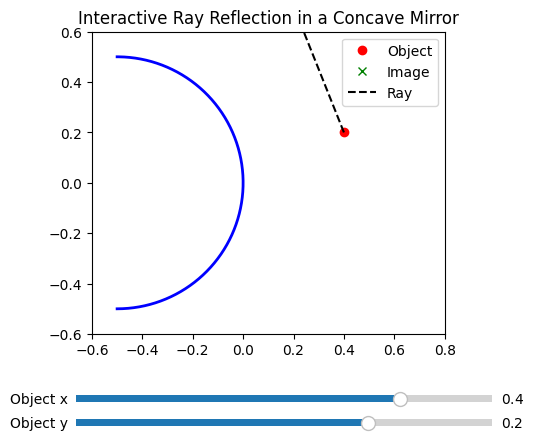

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Constants
R = 0.5  # Radius of curvature

# Equation utilities
def compute_image(xi, yi):
    theta_i = np.arctan2(yi, np.sqrt(R**2 - xi**2))
    mi = np.tan(2 * theta_i)
    denom = (yi / xi + mi)
    Xi = (-mi * np.sqrt(R**2 - yi**2) - yi) / denom
    Yi = (-yi * mi * np.sqrt(R**2 - yi**2)) / denom + mi
    return Xi, Yi

# Setup plot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)
theta = np.linspace(-np.pi/2, np.pi/2, 500)
mirror_x = R * np.cos(theta) - R  # Mirror centered at (-R, 0)
mirror_y = R * np.sin(theta)
ax.plot(mirror_x, mirror_y, 'b', linewidth=2)
obj_point, = ax.plot([], [], 'ro', label="Object")
img_point, = ax.plot([], [], 'gx', label="Image")
ray_line, = ax.plot([], [], 'k--', label="Ray")
ax.legend()

# Axis settings
ax.set_xlim(-0.6, 0.8)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect('equal')
ax.set_title("Interactive Ray Reflection in a Concave Mirror")

# Sliders for object point
ax_x = plt.axes([0.2, 0.1, 0.65, 0.03])
ax_y = plt.axes([0.2, 0.05, 0.65, 0.03])
slider_x = Slider(ax_x, 'Object x', -0.3, 0.6, valinit=0.4)
slider_y = Slider(ax_y, 'Object y', -0.5, 0.5, valinit=0.2)

# Update function
def update(val):
    x = slider_x.val
    y = slider_y.val
    obj_point.set_data([x], [y])

    try:
        Xi, Yi = compute_image(x, y)
        img_point.set_data([Xi], [Yi])
        ray_line.set_data([x, Xi], [y, Yi])
    except Exception as e:
        print("Math error:", e)
        img_point.set_data([], [])
        ray_line.set_data([], [])

    fig.canvas.draw_idle()

update(None)  # Initial draw
plt.show()
